In [10]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True

In [140]:
def methylate(smi: str) -> list[str]:
    """Generates all unique methylations including stereoisomers.

    Examples
    --------
    analogs = methylate('CC1CCCCC1')

    Parameters
    ----------
    smi: str
        The input SMILES string.

    Returns
    -------
    list[str]
        A list containing all unique methylations as SMILES strings."""
    mol = Chem.MolFromSmiles(smi)
    num_atoms = mol.GetNumAtoms()
    analogs = []

    for i, atom in enumerate(mol.GetAtoms()):
        # require the atom to be methylated has hydrogens
        if atom.GetTotalNumHs() > 0:
            # carbons are treated differently from heteroatoms due to stereochem
            if atom.GetAtomicNum() == 6:
                # use RWMol to edit the molecule
                analog = Chem.RWMol(mol)
                analog.AddAtom(Chem.Atom(6))
                analog.AddBond(i, num_atoms, Chem.BondType.SINGLE)
                # if the atom is not sp3, there cannot be a stereocenter
                if atom.GetHybridization() != Chem.HybridizationType.SP3:
                    analog = analog.GetMol()
                    analogs.append(Chem.MolToSmiles(analog))
                # if there is a possible stereocenter, we generate both possible
                #  mols and compare their SMILES strings to check for uniqueness
                else:
                    analog.GetAtomWithIdx(i).SetChiralTag(Chem.ChiralType.CHI_TETRAHEDRAL_CW)
                    cw_isomer = analog.GetMol()
                    analog.GetAtomWithIdx(i).SetChiralTag(Chem.ChiralType.CHI_TETRAHEDRAL_CCW)
                    ccw_isomer = analog.GetMol()
                    if Chem.MolToSmiles(cw_isomer) == Chem.MolToSmiles(ccw_isomer):
                        analogs.append(Chem.MolToSmiles(cw_isomer))
                    else:
                        analogs.append(Chem.MolToSmiles(cw_isomer))
                        analogs.append(Chem.MolToSmiles(ccw_isomer))
            # heteroatoms do not require a stereochem check
            if atom.GetAtomicNum() in [7, 8, 16]:
                analog = Chem.RWMol(mol)
                analog.AddAtom(Chem.Atom(6))
                analog.AddBond(i, num_atoms, Chem.BondType.SINGLE)
                analog = analog.GetMol()
                analogs.append(Chem.MolToSmiles(analog))
            
    return list(set(analogs))
            

In [141]:
methylate('ONC(=O)C1CC=CC1')

['C[C@@]1(C(=O)NO)CC=CC1',
 'CONC(=O)C1CC=CC1',
 'C[C@H]1C=CCC1C(=O)NO',
 'CN(O)C(=O)C1CC=CC1',
 'CC1=CCC(C(=O)NO)C1',
 'C[C@@H]1C=CCC1C(=O)NO']

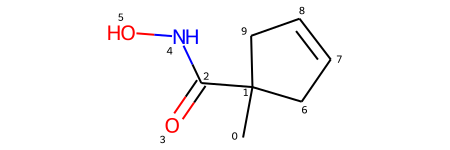

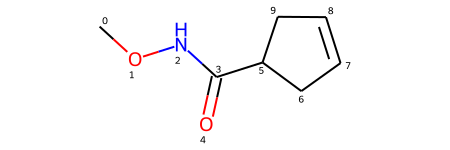

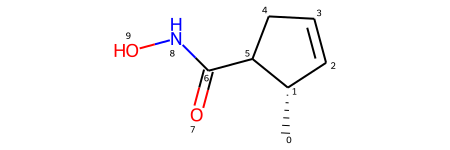

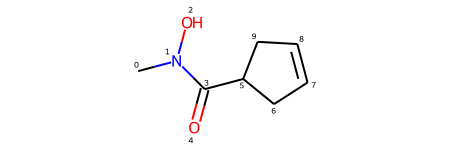

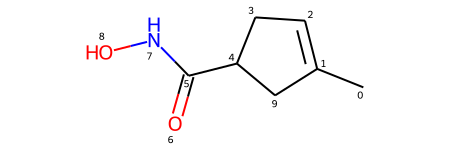

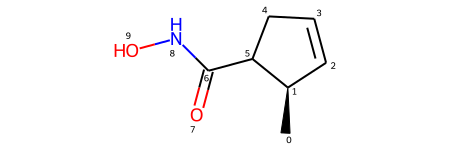

In [138]:
analogs = methylate('ONC(=O)C1CC=CC1')
for analog in analogs:
    display(Chem.MolFromSmiles(analog))

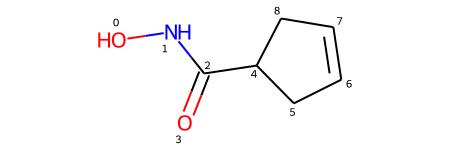

In [107]:
m = Chem.MolFromSmiles('ONC(=O)C1CC=CC1')
num_atoms = m.GetNumAtoms()
m

In [114]:
methylated = []
for i, atom in enumerate(m.GetAtoms()):
    if atom.GetTotalNumHs() > 0:
        if atom.GetAtomicNum() == 6:
            new_m = Chem.RWMol(m)
            new_m.AddAtom(Chem.Atom(6))
            new_m.AddBond(i, num_atoms, Chem.BondType.SINGLE)
            if atom.GetHybridization() != Chem.HybridizationType.SP3:
                new_m = new_m.GetMol()
                new_m.UpdatePropertyCache()
                methylated.append(Chem.MolToSmiles(new_m))
            else:
                new_m.GetAtomWithIdx(i).SetChiralTag(Chem.ChiralType.CHI_TETRAHEDRAL_CW)
                cw_isomer = new_m.GetMol()
                cw_isomer.UpdatePropertyCache()
                new_m.GetAtomWithIdx(i).SetChiralTag(Chem.ChiralType.CHI_TETRAHEDRAL_CCW)
                ccw_isomer = new_m.GetMol()
                ccw_isomer.UpdatePropertyCache
                if Chem.MolToSmiles(cw_isomer) == Chem.MolToSmiles(ccw_isomer):
                    methylated.append(Chem.MolToSmiles(cw_isomer))
                else:
                    methylated.append(Chem.MolToSmiles(cw_isomer))
                    methylated.append(Chem.MolToSmiles(ccw_isomer))
        if atom.GetAtomicNum() in [7, 8]:
            new_m = Chem.RWMol(m)
            new_m.AddAtom(Chem.Atom(6))
            new_m.AddBond(i, num_atoms, Chem.BondType.SINGLE)
            new_m = new_m.GetMol()
            new_m.UpdatePropertyCache()
            methylated.append(Chem.MolToSmiles(new_m))


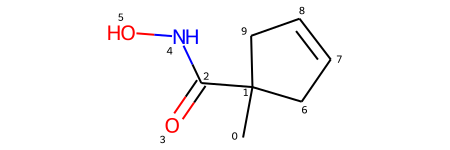

C[C@@]1(C(=O)NO)CC=CC1


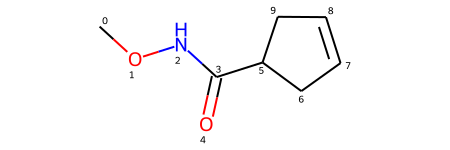

CONC(=O)C1CC=CC1


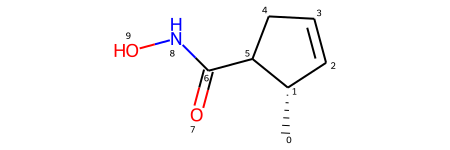

C[C@H]1C=CCC1C(=O)NO


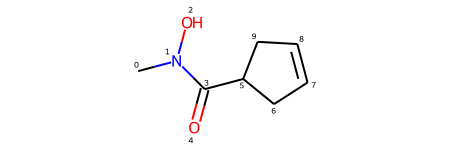

CN(O)C(=O)C1CC=CC1


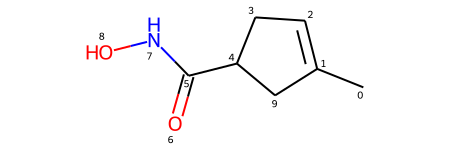

CC1=CCC(C(=O)NO)C1


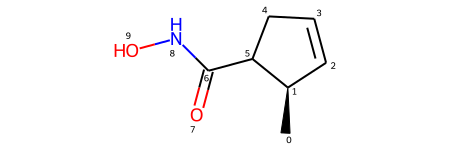

C[C@@H]1C=CCC1C(=O)NO


In [117]:
methylated = list(set(methylated))
for methyl in methylated:
    mol = Chem.MolFromSmiles(methyl)
    display(mol)
    print(methyl)